<a href="https://colab.research.google.com/github/Mhtag/tensorflow/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.6.0'

In [ ]:
house_info = tf.constant(['bedroom','bathroom', 'garage'])
house_price = tf.constant([940000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([940000], dtype=int32)>)

# Steps in modelling with TensorFlow

1. **Creating a Model** - define the input and output layers, as well as the hiddemn layer
2. **Compile the model** - define the loss fumction, the optimizer( tells our model how to improve the pattern its learning), and evaluation metrics ( what we use to intepret our model)
3. **fitting a model** - letting a model try to find patterns between X and y ( features and label).

In [ ]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10


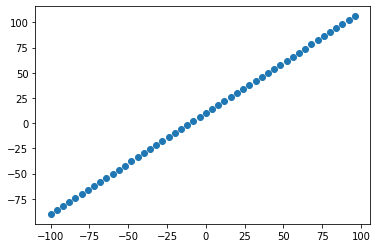

In [ ]:
plt.scatter(X,y)

### The 3 sets

1. Training Set - the model learns from this data, which is typically 70-80% of the total data you have available.
2. Validation Set - The model gets tunned on this data, which is typically 10-15% of the data available.
3. train set -  The model gets evluated on this data o test what is learned, this set is typically 10-15% of total data.


In [ ]:
len(X)

50

In [ ]:
# split the data into train and test set

X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Vizualize the data

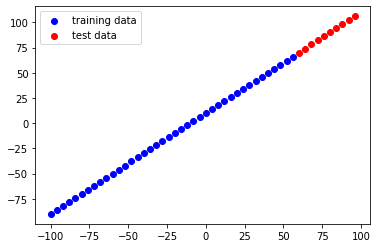

In [ ]:
plt.scatter(X_train, y_train, color='b', label='training data')
plt.scatter(X_test,y_test, color='r',label='test data')
plt.legend()

## Initialize a model

In [ ]:
# create the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# complile the model

model.compile(loss=tf.keras.losses.mean_absolute_error,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# Fit the model
#model.fit(X_train,y_train, epochs=100)

# Vizualize the model

In [ ]:
tf.random.set_seed(42)

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(10, name='input_layer'),
                            tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
])

# complile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [ ]:
# lets fit our model to data

model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
from tensorflow.keras.utils import plot_model

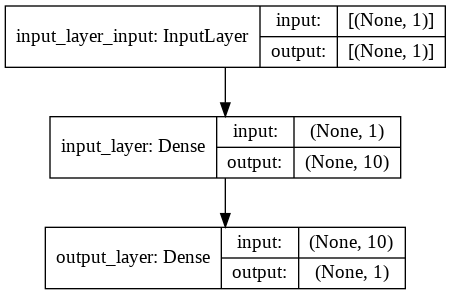

In [ ]:
plot_model(model=model, show_shapes=True)

## Vizualize our model prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

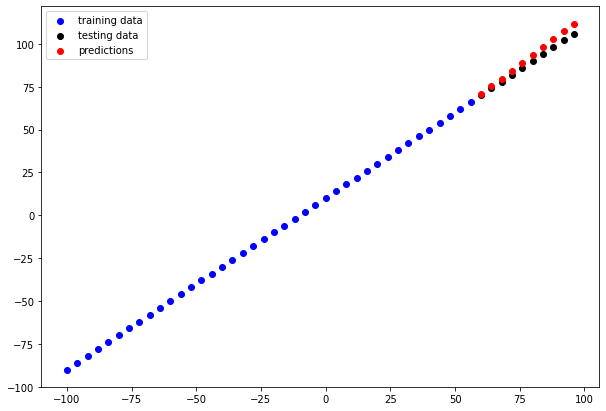

In [ ]:
## Lets create a ploting fuction

def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, color='b', label='training data')
  plt.scatter(test_data,test_labels, color='black', label='testing data')
  plt.scatter(test_data, predictions, color='r', label='predictions')
  plt.legend()

plot_predictions()

## Evaluate Metics

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 119ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
error = tf.metrics.mean_absolute_error(y_test, y_pred=tf.constant(y_pred))
error

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# calculate mean squared error
mse = tf.metrics.mean_squared_error(y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# make the fuction to return mse and mae

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy()

## Improve our model

1. Get more data.
2. Make model larger.
3. more epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# create the model
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

# compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# fit the model
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

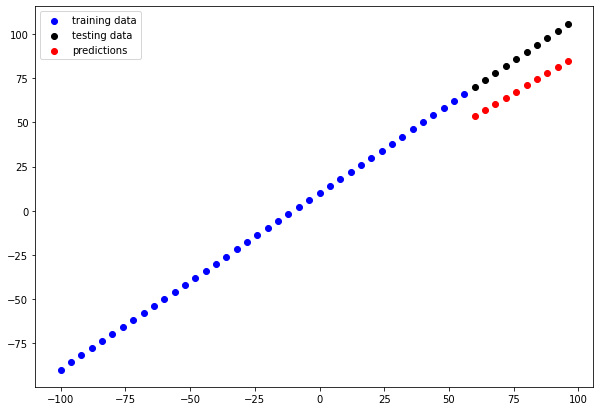

In [ ]:
y_pred1 = model1.predict(X_test)

plot_predictions(X_train,y_train,X_test,y_test,predictions=y_pred1)

In [ ]:
# calculate model_1 evatuation metrics

mae1 = mae(y_test,y_pred=y_pred1)
mse1 = mse(y_test,y_pred=y_pred1)
mae1, mse1

(18.745327, 353.57336)

In [ ]:
# create the model
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(lr=.005),
               metrics=['mae'])

# Fit the model
model2.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 22.8829 - mae: 22.8829
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 15.5050 - mae: 15.5050
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0729 - mae: 19.0729
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7287 - mae: 8.7287
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1509 - mae: 8.1509
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.8145 - mae: 12.8145
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9532 - mae: 9.9532
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8875 - mae: 9.8875
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 26.8123 - mae: 26.8123
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5894 - mae: 7.5894
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - los

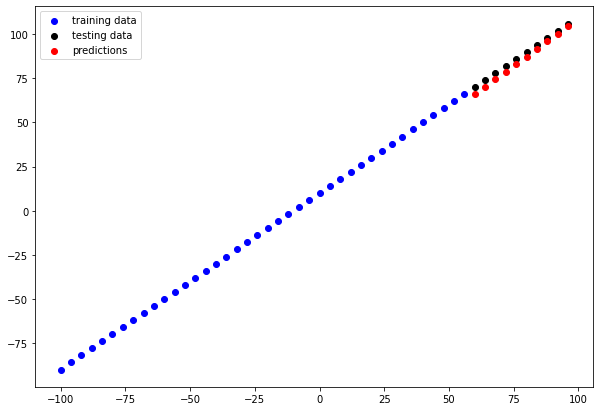

In [ ]:
# make and plot predictions
y_pred2 = model2.predict(X_test)

plot_predictions(predictions=y_pred2)

In [ ]:
mae2 = mae(y_test, y_pred2)
mse2 = mse(y_test, y_pred2)

mae2, mse2

(2.8356369, 8.7770405)

In [ ]:
# Model3

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6ms/

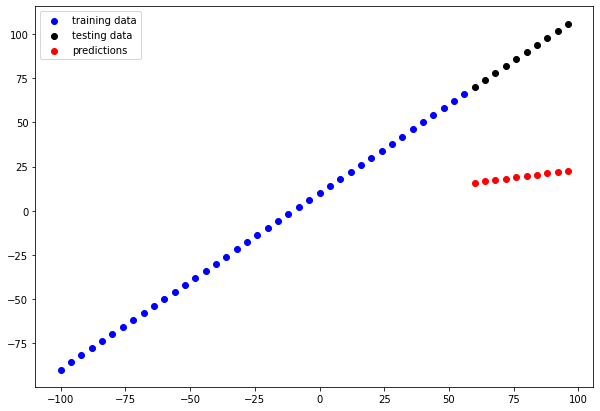

In [ ]:
y_pred3 = model3.predict(X_test)

plot_predictions(predictions=y_pred3)

In [ ]:
mae3 = mae(y_test,y_pred3)
mse3 = mse(y_test,y_pred3)

mae3, mse3

(68.713615, 4808.0273)

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# saving our model

In [ ]:
model2.save('first_tensorflow_model')

INFO:tensorflow:Assets written to: first_tensorflow_model/assets


In [ ]:
# Save model using HDF5 format
model2.save('my_model.h5')

## Load the model

In [ ]:
load_saved_model = tf.keras.models.load_model('/content/first_tensorflow_model')
load_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compare model2 prediction with loaded model prediction

loaded_pred = load_saved_model.predict(X_test)

loaded_pred == y_pred2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])